데이터 최소 길이 53
데이터 최대 길이 150
훈련 데이터 총 개수: 9053
테스트 데이터 총 개수: 2264
훈련 데이터 스팸 개수 1053
테스트 데이터 스팸 개수 264
훈련 데이터 일반 개수 8000
테스트 데이터 일반 개수 2000
--------------------------------
스팸 데이터 예시



여보세요. 네 안녕하세요 검찰청이에요 검찰청이요 네 통화 괜찮으십니까. 
네 가능합니다 전화 받으신 분이 김윤환 씨 맞으시죠. 
네
네 맞습니다
예 다름이 아니라 본인과 연루된 명의도용 사건이 접수가 돼서 지금까지 확인 좀 해서 연락을 드렸고요. 
명의도용이요 예. 
--------------------------------
일반 데이터 예시


양치하고 올께 알겠오 다녀오세용 양치 끝 넌 근데 점심먹고 양ㅊ 하니? 아.. 오늘 안했네 양치해야겠다 밥 먹고 양치하고 커피 근데 커피 치아에 엄청 안좋대 그러니까 빨대로 목구멍에 바로 넘겨 입에 머금지 말고 응응 
--------------------------------
전처리 후 스팸 데이터 예시


['여보세요', '네', '안녕하다', '검찰청', '이에요', '검찰청', '이', '요', '네', '통화', '괜찮다', '네', '가능하다', '전화', '받다', '분', '이', '김윤환', '씨', '맞다', '네', '네', '맞다', '예', '다르다', '아니다', '본인', '과', '연루', '되다', '명의', '도용', '사건', '이', '접수', '가', '돼다', '지금', '까지', '확인', '좀', '하다', '연락', '을', '드리다', '명의', '도', '용이', '요', '예']
--------------------------------
전처리 후 일반 데이터 예시


['양치', '하고', '오다', '알다', '다녀오다', '양치', '끝', '넌', '근데', '점심', '먹다', '양', 'ㅊ', '하니', '아', '..', '오늘', '안

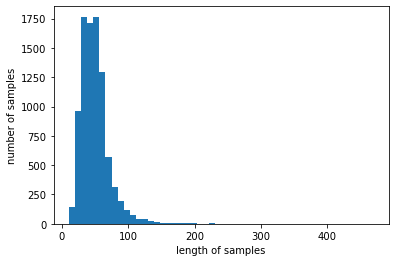

Epoch 1/15
121/121 [==============================] - ETA: 0s - loss: 0.1207 - acc: 0.9664
Epoch 00001: val_acc improved from -inf to 0.99834, saving model to LSTM_module_ver2.0.h5
121/121 [==============================] - 10s 82ms/step - loss: 0.1207 - acc: 0.9664 - val_loss: 0.0038 - val_acc: 0.9983
Epoch 2/15
121/121 [==============================] - ETA: 0s - loss: 0.0165 - acc: 0.9979
Epoch 00002: val_acc improved from 0.99834 to 0.99945, saving model to LSTM_module_ver2.0.h5
121/121 [==============================] - 9s 78ms/step - loss: 0.0165 - acc: 0.9979 - val_loss: 0.0022 - val_acc: 0.9994
Epoch 3/15
121/121 [==============================] - ETA: 0s - loss: 0.0061 - acc: 0.9986
Epoch 00003: val_acc did not improve from 0.99945
121/121 [==============================] - 9s 75ms/step - loss: 0.0061 - acc: 0.9986 - val_loss: 0.0033 - val_acc: 0.9989
Epoch 4/15
121/121 [==============================] - ETA: 0s - loss: 1.0775e-04 - acc: 1.0000
Epoch 00004: val_acc did not imp

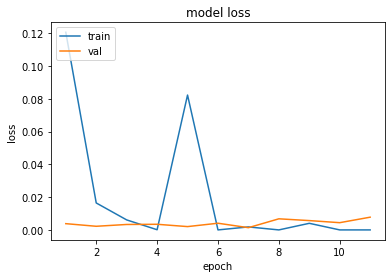

In [9]:
import os
import json
from pandas import Series
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score

temp_list = []
temp_X = []
train_X = []
test_X = []
train_y = []
test_y = []
train_cnt = 8000
test_cnt = 2000

# 피싱 대화 데이터 가져오기
path = 'fraudDataset/spamData/'
path1 = os.listdir(path)
for a in path1:
    path2 = path+a
    with open(path2, 'r', encoding='utf-8') as f:
        contents = f.read()
        temp_list.append(contents)
        
max_data = 150
min_data = 50
for t in temp_list:
    x = [t[i:i+max_data] for i in range(0, len(t), max_data)] # 텍스트 파일 중 150 길이로 데이터 길이 제한
    train_X.extend(x)
    
for s in train_X:
    if len(s) > min_data: # 길이가 50 이하인 데이터 삭제
        temp_X.append(s)
train_X = temp_X

print('데이터 최소 길이',len(min(train_X, key=len)))
print('데이터 최대 길이',len(max(train_X, key=len)))

# train, test Data 분리
n_X = int(len(train_X) * 0.8)
test_X = train_X[n_X:]
train_X = train_X[:n_X]

for y in range(len(train_X)):
    train_y.append(1) # label 추가
    
for y in range(len(test_X)):
    test_y.append(1)

# 일상 대화 데이터 가져오기
path = 'fraudDataset/hamData/'
path1 = os.listdir(path)
for a in path1:
    path2 = os.listdir(path+a)
    for b in path2:
        path3 = path+a+'/'+b
        with open(path3, 'r', encoding='utf-8') as f:
            contents = f.read()
            json_data = json.loads(contents)
            data = ''
            data = json_data['data']
            for i in range(len(data)):                
                sentence = ''
                dialogue = data[i]['body']['dialogue']
                for j in range(len(dialogue)):
                    utterance = dialogue[j]['utterance']
                    sentence += utterance+' '
                
                if a == 'Training':
                    if train_y.count(0) == train_cnt:
                        break
                    train_X.append(sentence)
                    train_y.append(0)
                else:
                    if test_y.count(0) == test_cnt:
                        break
                    test_X.append(sentence)
                    test_y.append(0)

print('훈련 데이터 총 개수:',len(train_X))
print('테스트 데이터 총 개수:',len(test_X))
print('훈련 데이터 스팸 개수',train_y.count(1))
print('테스트 데이터 스팸 개수',test_y.count(1))
print('훈련 데이터 일반 개수',train_y.count(0))
print('테스트 데이터 일반 개수',test_y.count(0))
print('--------------------------------')
print('스팸 데이터 예시')
print('\n')
print(train_X[0])
print('--------------------------------')
print('일반 데이터 예시')
print('\n')
print(train_X[train_y.count(1)])
print('--------------------------------')

y_train = np.array(train_y)
y_test = np.array(test_y)

okt = Okt()
stopwords = ['\n','.','?',',','']

X_train = []
for sentence in train_X:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 처리
    X_train.append(temp_X)

X_test = []
for sentence in test_X:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 처리
    X_test.append(temp_X)
    
print('전처리 후 스팸 데이터 예시')
print('\n')
print(X_train[0])
print('--------------------------------')
print('전처리 후 일반 데이터 예시')
print('\n')
print(X_train[train_y.count(1)])
print('--------------------------------')

# 한글은 형태소 분석기 사용해야됨 KoNPLY
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
threshold = 3
word_to_index = tokenizer.word_index
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 토큰화된 각 단어 index를 json 형태로 저장
json_index = json.dumps(word_to_index)
with open("LSTM_module_ver2.0_wordIndex.json", "w") as f:
    f.write(json_index)

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
        
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

#vocab_size = total_cnt - rare_cnt + 1
vocab_size = total_cnt + 1 # predict Error 해결
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# 빈 샘플들을 제거
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print('최대 길이 :',max(len(l) for l in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

max_len = 100 # 최대 길이 (그래프를 보고 판단, predict 파일도 수정)
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('LSTM_module_ver2.0.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# 변수 파일 저장
d = {'max_data':max_data, 'min_data':min_data, 'max_len':max_len}
json_var = json.dumps(d)
with open('LSTM_module_ver2.0_variable.json', 'w') as f:
    f.write(json_var)